In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
epl_df = pd.read_csv('all_players_stats.csv') 
epl_df.head()

,Team,JerseyNo,Player,Position,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards
0,Arsenal,7,Bukayo Saka,Defender/Midfielder,40,3,12,2,6.0,0.0
1,Arsenal,6,Gabriel,Defender,37,1,5,0,7.0,1.0
2,Arsenal,32,Aaron Ramsdale,Goalkeeper,37,0,0,0,1.0,0.0
3,Arsenal,4,Ben White,Defender,37,0,0,0,3.0,0.0
4,Arsenal,8,Martin Odegaard,Midfielder,36,4,7,0,4.0,0.0


In [4]:
epl_df.describe()

,JerseyNo,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,22.597111,16.861958,4.630819,2.245586,0.168539,2.457464,0.086677
std,18.719450,13.950425,4.950411,4.072776,0.787057,2.694708,0.303568
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,16.000000,3.000000,1.000000,0.000000,2.000000,0.000000
75%,30.000000,27.500000,7.000000,3.000000,0.000000,4.000000,0.000000
max,97.000000,54.000000,25.000000,31.000000,9.000000,12.000000,2.000000


In [5]:
epl_df.isna().sum()

Team             0
JerseyNo         0
Player           0
Position         0
Apearances       0
Substitutions    0
Goals            0
Penalties        0
YellowCards      0
RedCards         0
dtype: int64

In [12]:
epl_df['SubPerApearances'] = (epl_df['Substitutions'] / epl_df['Apearances']).astype(float)
epl_df['GoalsPerApearances'] = (epl_df['Goals'] / epl_df['Apearances']).astype(float)
epl_df.head()

,Team,JerseyNo,Player,Position,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards,SubPerApearances,GoalsPerApearances
0,Arsenal,7,Bukayo Saka,Defender/Midfielder,40,3,12,2,6.0,0.0,0.075000,0.300000
1,Arsenal,6,Gabriel,Defender,37,1,5,0,7.0,1.0,0.027027,0.135135
2,Arsenal,32,Aaron Ramsdale,Goalkeeper,37,0,0,0,1.0,0.0,0.000000,0.000000
3,Arsenal,4,Ben White,Defender,37,0,0,0,3.0,0.0,0.000000,0.000000
4,Arsenal,8,Martin Odegaard,Midfielder,36,4,7,0,4.0,0.0,0.111111,0.194444


In [13]:
total_goals = epl_df['Goals'].sum()
total_goals

1399

In [15]:
total_penalty =epl_df['Penalties'].sum()
total_penalty

105

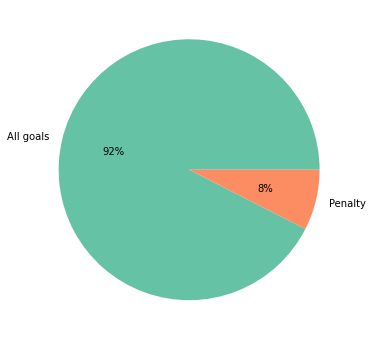

In [16]:
plt.figure(figsize=(13, 6))
total_all_goals = epl_df['Goals'].sum() - total_penalty
data = [total_all_goals, total_penalty]
labels = ['All goals', 'Penalty']
color = sns.color_palette('Set2')
plt.pie(data, labels = labels, colors = color, autopct = '%.0f%%')
plt.show()

In [18]:
epl_df['Position'].unique()

array(['Defender/Midfielder', 'Defender', 'Goalkeeper', 'Midfielder',
       'Forward', 'Midfielder/Forward', 'Defender/Midfielder/Forward',
       'Defender/Forward'], dtype=object)

In [22]:
epl_df[epl_df['Position']=='Forward']

,Team,JerseyNo,Player,Position,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards,SubPerApearances,GoalsPerApearances,Defender/Midfielder,Defender,Goalkeeper,Midfielder,Forward,Midfielder/Forward,Defender/Midfielder/Forward,Defender/Forward
6,Arsenal,35,Gabriel Martinelli,Forward,26,10,6,1,2.0,1.0,0.384615,0.230769,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
10,Arsenal,9,Alexandre Lacazette,Forward,23,13,6,3,1.0,0.0,0.565217,0.260870,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
16,Arsenal,14,Pierre-Emerick Aubameyang,Forward,13,2,7,0,3.0,0.0,0.153846,0.538462,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
17,Arsenal,30,Eddie Nketiah,Forward,13,14,10,0,3.0,0.0,1.076923,0.769231,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
25,Arsenal,26,Folarin Balogun,Forward,2,2,0,0,1.0,0.0,1.000000,0.000000,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,Watford,10,João Pedro,Forward,16,13,4,0,1.0,0.0,0.812500,0.250000,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
550,Watford,7,Josh King,Forward,28,5,5,1,5.0,0.0,0.178571,0.178571,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
604,Wolverhampton Wanderers,17,Fábio Silva,Forward,10,16,0,0,1.0,0.0,1.600000,0.000000,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
606,Wolverhampton Wanderers,26,HWANG Hee-chan,Forward,21,10,5,0,2.0,0.0,0.476190,0.238095,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward


In [25]:
np.size((epl_df['JerseyNo'].unique()))

82

<AxesSubplot:xlabel='JerseyNo'>

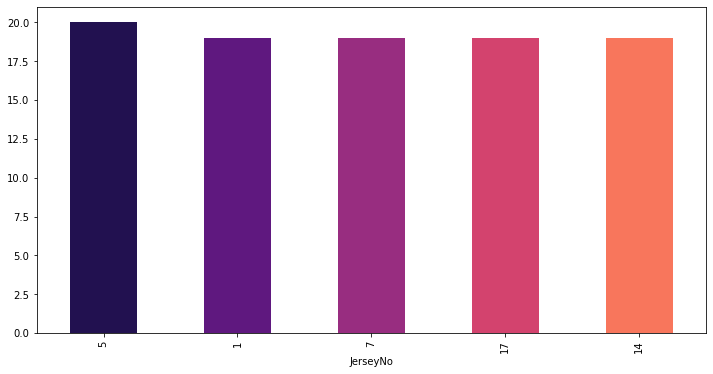

In [27]:
jersey_no = epl_df.groupby('JerseyNo').size().sort_values(ascending = False)
jersey_no.head(5).plot(kind = 'bar', figsize = (12,6), color = sns.color_palette("magma"))

<AxesSubplot:>

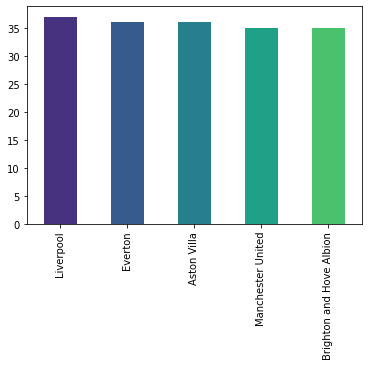

In [28]:
epl_df['Team'].value_counts().nlargest(5).plot(kind = 'bar', color = sns.color_palette("viridis"))

In [29]:
NeverSub = epl_df[epl_df['Substitutions'] <= 0]
Sub_0_5 = epl_df[(epl_df['Substitutions'] > 0) & (epl_df['Substitutions'] <= 5)]
Sub_5_10 = epl_df[(epl_df['Substitutions'] > 5) & (epl_df['Substitutions'] <= 10)]
Sub = epl_df[epl_df['Substitutions'] > 10]

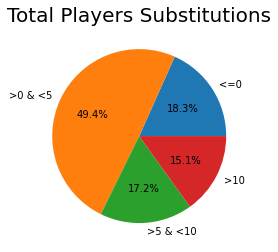

In [31]:
x = np.array([NeverSub['Substitutions'].count(), Sub_0_5['Substitutions'].count(), Sub_5_10['Substitutions'].count(), Sub['Substitutions'].count()])
mylabels = ["<=0", ">0 & <5", ">5 & <10", ">10"]
plt.title('Total Players Substitutions', fontsize = 20)
plt.pie(x, labels=mylabels, autopct="%.1f%%")
plt.show()

<AxesSubplot:>

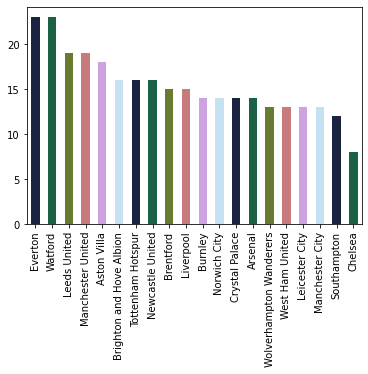

In [32]:
team_sub = epl_df[(epl_df['Substitutions'] > 0) & (epl_df['Substitutions'] <= 5)]
team_sub['Team'].value_counts().plot(kind='bar', color = sns.color_palette("cubehelix"))

In [34]:
team_sub[team_sub['Team']=='Everton']

,Team,JerseyNo,Player,Position,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards,SubPerApearances,GoalsPerApearances,Defender/Midfielder,Defender,Goalkeeper,Midfielder,Forward,Midfielder/Forward,Defender/Midfielder/Forward,Defender/Forward
214,Everton,6,Allan,Midfielder,28,3,0,0,7.0,1.0,0.107143,0.000000,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
218,Everton,32,Jarrad Branthwaite,Defender,6,2,1,0,0.0,1.0,0.333333,0.166667,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
219,Everton,9,Dominic Calvert-Lewin,Midfielder/Forward,15,3,5,2,2.0,0.0,0.200000,0.333333,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
220,Everton,28,Cenk Tosun,Forward,0,3,0,0,0.0,0.0,inf,NaN,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
221,Everton,23,Seamus Coleman,Defender/Midfielder,33,1,1,0,4.0,0.0,0.030303,0.030303,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
222,Everton,26,Tom Davies,Midfielder,4,4,1,0,1.0,0.0,1.000000,0.250000,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
223,Everton,8,Fabian Delph,Midfielder,8,3,0,0,2.0,0.0,0.375000,0.000000,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
224,Everton,12,Lucas Digne,Defender/Midfielder,14,1,1,0,4.0,0.0,0.071429,0.071429,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
225,Everton,61,Lewis Dobbin,Forward,0,5,0,0,1.0,0.0,inf,NaN,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
226,Everton,16,Abdoulaye Doucouré,Midfielder,31,3,2,0,6.0,0.0,0.096774,0.064516,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward


In [35]:
team_sub[team_sub['Team']=='Watford']

,Team,JerseyNo,Player,Position,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards,SubPerApearances,GoalsPerApearances,Defender/Midfielder,Defender,Goalkeeper,Midfielder,Forward,Midfielder/Forward,Defender/Midfielder/Forward,Defender/Forward
532,Watford,15,Craig Cathcart,Defender,28,4,0,0,3.0,0.0,0.142857,0.000000,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
534,Watford,45,Kamil Conteh,Midfielder,0,1,0,0,0.0,0.0,inf,NaN,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
535,Watford,9,Troy Deeney,Forward,0,2,0,0,0.0,0.0,inf,NaN,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
536,Watford,25,Emmanuel Dennis,Forward,30,5,10,0,7.0,1.0,0.166667,0.333333,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
538,Watford,4,Peter Etebo,Midfielder,5,5,0,0,3.0,0.0,1.000000,0.000000,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
539,Watford,21,Kiko Femenía,Defender/Midfielder,26,2,0,0,2.0,0.0,0.076923,0.000000,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
540,Watford,17,Ashley Fletcher,Forward,3,3,2,0,0.0,0.0,1.000000,0.666667,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
541,Watford,47,Shaqai Forde,Forward,0,1,0,0,0.0,0.0,inf,NaN,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
543,Watford,16,Dan Gosling,Defender/Midfielder,3,3,1,0,0.0,0.0,1.000000,0.333333,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
546,Watford,27,Christian Kabasele,Defender,13,4,0,0,0.0,0.0,0.307692,0.000000,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward


In [36]:
team_sub[team_sub['Team']=='Leeds United']

,Team,JerseyNo,Player,Position,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards,SubPerApearances,GoalsPerApearances,Defender/Midfielder,Defender,Goalkeeper,Midfielder,Forward,Midfielder/Forward,Defender/Midfielder/Forward,Defender/Forward
250,Leeds United,2,Luke Ayling,Defender,27,1,2,0,4.0,1.0,0.037037,0.074074,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
251,Leeds United,9,Patrick Bamford,Forward,7,3,2,0,2.0,0.0,0.428571,0.285714,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
252,Leeds United,26,Lewis Bate,Midfielder,2,2,0,0,0.0,0.0,1.000000,0.000000,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
253,Leeds United,6,Liam Cooper,Defender,21,1,0,0,5.0,0.0,0.047619,0.000000,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
254,Leeds United,35,Charlie Cresswell,Defender,2,4,0,0,1.0,0.0,2.000000,0.000000,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
255,Leeds United,15,Stuart Dallas,Defender/Midfielder,36,1,1,0,5.0,0.0,0.027778,0.027778,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
256,Leeds United,37,Cody Drameh,Defender,2,3,0,0,2.0,0.0,1.500000,0.000000,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
260,Leeds United,22,Jack Harrison,Midfielder,35,3,10,0,3.0,0.0,0.085714,0.285714,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
261,Leeds United,17,Hélder Costa,Midfielder/Forward,1,1,0,0,0.0,0.0,1.000000,0.000000,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward
262,Leeds United,33,Leo Hjelde,Defender,1,2,0,0,0.0,0.0,2.000000,0.000000,Forward,Forward,Forward,Forward,Forward,Forward,Forward,Forward


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Arsenal'),
  Text(1, 0, 'Aston Villa'),
  Text(2, 0, 'Brentford'),
  Text(3, 0, 'Brighton and Hove Albion'),
  Text(4, 0, 'Burnley'),
  Text(5, 0, 'Chelsea'),
  Text(6, 0, 'Crystal Palace'),
  Text(7, 0, 'Everton'),
  Text(8, 0, 'Leeds United'),
  Text(9, 0, 'Leicester City'),
  Text(10, 0, 'Liverpool'),
  Text(11, 0, 'Manchester City'),
  Text(12, 0, 'Manchester United'),
  Text(13, 0, 'Newcastle United'),
  Text(14, 0, 'Norwich City'),
  Text(15, 0, 'Southampton'),
  Text(16, 0, 'Tottenham Hotspur'),
  Text(17, 0, 'Watford'),
  Text(18, 0, 'West Ham United'),
  Text(19, 0, 'Wolverhampton Wanderers')])

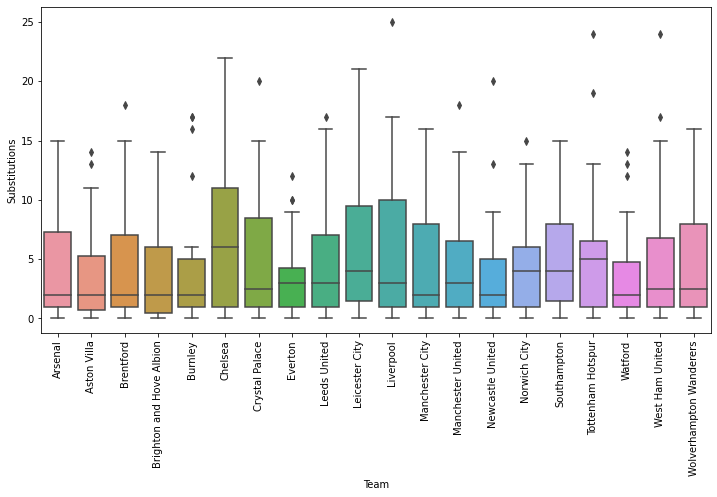

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'Team', y = 'Substitutions', data = epl_df)
plt.xticks(rotation = 90)

In [38]:
num_player = epl_df.groupby('Team').size()
data = (epl_df.groupby('Team')['Substitutions'].sum()) / num_player
data.sort_values(ascending = False)

Team
Chelsea                     6.636364
Leicester City              6.000000
Liverpool                   5.945946
Tottenham Hotspur           5.290323
West Ham United             5.200000
Southampton                 5.185185
Crystal Palace              5.153846
Arsenal                     4.678571
Norwich City                4.620690
Manchester United           4.600000
Manchester City             4.515152
Brentford                   4.483871
Wolverhampton Wanderers     4.321429
Burnley                     4.240000
Leeds United                4.206897
Newcastle United            3.931034
Brighton and Hove Albion    3.742857
Watford                     3.411765
Everton                     3.361111
Aston Villa                 3.361111
dtype: float64

Text(0.5, 1.0, 'Plot of Team VS Total Goals')

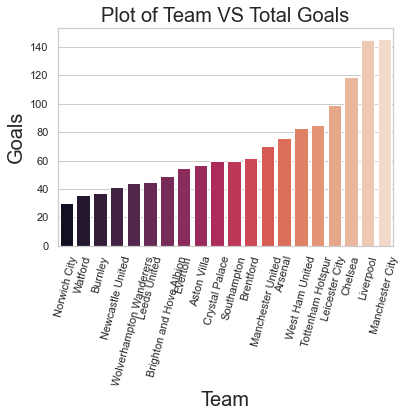

In [39]:
goals_by_clubs = pd.DataFrame(epl_df.groupby('Team', as_index=False)['Goals'].sum())
sns.set_theme(style="whitegrid", color_codes=True)
ax = sns.barplot(x='Team', y='Goals', data=goals_by_clubs.sort_values(by="Goals"), palette='rocket')
ax.set_xlabel("Team", fontsize=20)
ax.set_ylabel("Goals", fontsize=20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20, 8)
plt.title('Plot of Team VS Total Goals', fontsize=20)

In [50]:
epl_df['GoalsWhitoutPenalty'] = (epl_df['Goals'] - epl_df['Penalties']).astype(int)
top_10_goals = epl_df[['Player', 'Team', 'Apearances', 'Goals', 'GoalsWhitoutPenalty']].nlargest(n=10, columns='Goals')
top_10_goals

,Player,Team,Apearances,Goals,GoalsWhitoutPenalty
341,Mohamed Salah,Liverpool,44,31,25
514,Harry Kane,Tottenham Hotspur,47,27,23
367,Riyad Mahrez,Manchester City,31,24,17
407,Cristiano Ronaldo,Manchester United,35,24,21
511,SON Heung-min,Tottenham Hotspur,39,24,24
331,Sadio Mané,Liverpool,45,23,23
317,Diogo Jota,Liverpool,39,21,21
351,Kevin De Bruyne,Manchester City,39,19,18
296,James Maddison,Leicester City,40,18,18
572,Jarrod Bowen,West Ham United,45,18,18


In [53]:
top_10_goals_per_match = epl_df[['Player', 'GoalsPerApearances', 'Apearances', 'Goals', 'GoalsWhitoutPenalty', 'Team']].nlargest(n=10, columns='GoalsPerApearances')
top_10_goals_per_match

,Player,GoalsPerApearances,Apearances,Goals,GoalsWhitoutPenalty,Team
28,Cameron Archer,2.000000,2,4,4,Aston Villa
85,Marcus Forss,1.200000,5,6,5,Brentford
337,Divock Origi,1.200000,5,6,6,Liverpool
334,Takumi Minamino,1.111111,9,10,10,Liverpool
26,Charlie Patino,1.000000,1,1,1,Arsenal
40,Frederic Guilbert,1.000000,1,1,1,Aston Villa
129,Andi Zeqiri,1.000000,1,1,1,Brighton and Hove Albion
209,Jaïro Riedewald,1.000000,1,1,1,Crystal Palace
426,Jeff Hendrick,1.000000,1,1,1,Newcastle United
605,Morgan Gibbs-White,1.000000,1,1,1,Wolverhampton Wanderers


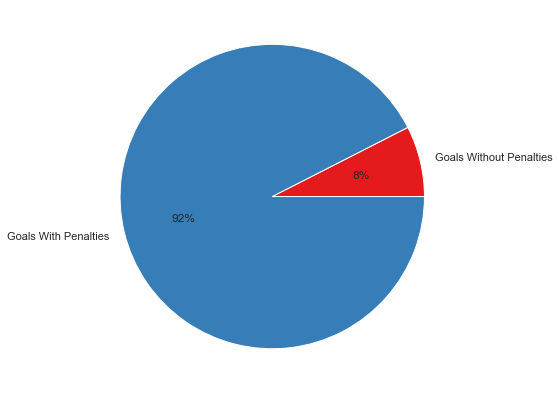

In [54]:
plt.figure(figsize=(14,7))
goal_without_penalty = epl_df['GoalsWhitoutPenalty'].sum()
data = [total_goals - goal_without_penalty, goal_without_penalty]
labels = ['Goals Without Penalties', 'Goals With Penalties']
color = sns.color_palette('Set1')
plt.pie(data, labels=labels, colors=color, autopct='%.0f%%')
plt.show()

<AxesSubplot:title={'center':'Players with The Most Yellow Cards'}, xlabel='Player', ylabel='Number of Yellow Cards'>

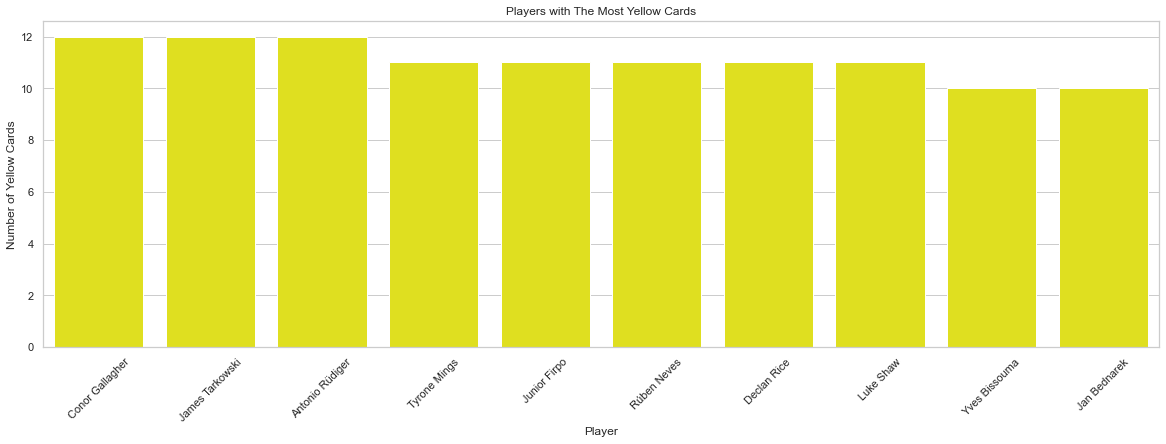

In [57]:
epl_yellow = epl_df.sort_values(by='YellowCards', ascending=False)[:10]
plt.figure(figsize=(20,6))
plt.title("Players with The Most Yellow Cards")
c = sns.barplot(x = epl_yellow['Player'], y = epl_yellow['YellowCards'], label = 'Players', color = 'yellow')
plt.ylabel('Number of Yellow Cards')
c.set_xticklabels(c.get_xticklabels(),rotation=45)
c

<AxesSubplot:title={'center':'Players with The Most Yellow Cards'}, xlabel='Player', ylabel='Number of Yellow Cards'>

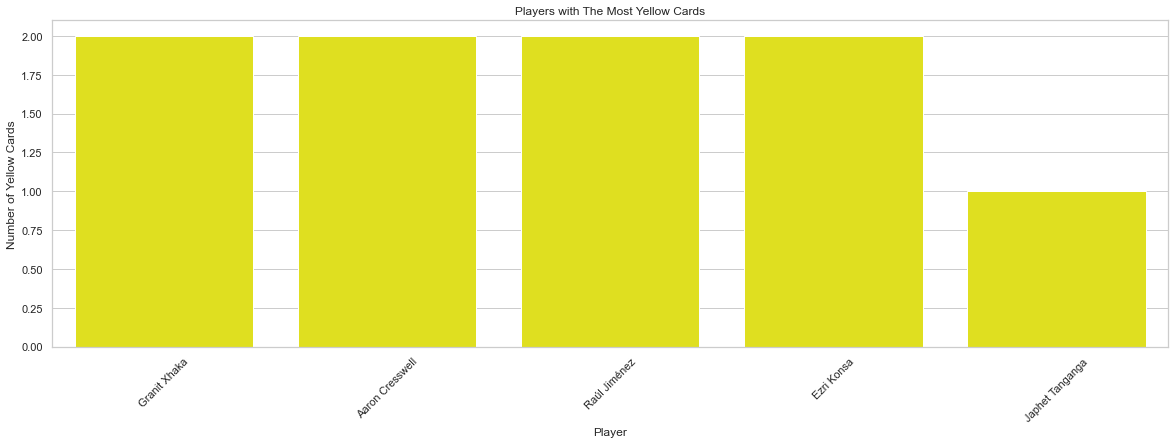

In [59]:
epl_yellow = epl_df.sort_values(by='RedCards', ascending=False)[:5]
plt.figure(figsize=(20,6))
plt.title("Players with The Most Yellow Cards")
c = sns.barplot(x = epl_yellow['Player'], y = epl_yellow['RedCards'], label = 'Players', color = 'yellow')
plt.ylabel('Number of Yellow Cards')
c.set_xticklabels(c.get_xticklabels(),rotation=45)
c